In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from functools import reduce
import operator

from common_plotting import read_data
from common_analysis import rel_data_cut_index_last, combine_stds_sum, combine_stds_mean, display_full_df
from common_analysis_dcv import (analyse_dcv_absolute, analyse_dcv_relative, analyse_dcv_k182, analyse_dcv_k182_for_other_reference, add_dut_neg_and_pos_group)

plt.rcParams["figure.figsize"] = (10,4)
plt.rc('font', size=14)

# Load data

In [2]:
thp_data, data = read_data(['k182-dcv-mv-log-unattended-short.csv'])
short_data = data['k182-dcv-mv-log-unattended-short.csv']

In [3]:
short_data_with_group = add_dut_neg_and_pos_group(short_data)
short_data_grouped = short_data_with_group.groupby(['group', 'dut_neg_lead']).agg({'k182_dcv': ['mean', 'std', 'count'], 'temperature': ['mean', 'std']})
display(short_data_grouped)

k182_dcv                       temperature          
                            mean           std   count        mean       std
group dut_neg_lead                                                          
1     F732a2        1.595141e-07  1.559864e-08    6092   27.211327  0.084489
2     K1488        -6.539850e-09  1.657296e-08   10640   28.830722  1.372441
3     F732a2        1.579171e-07  1.569007e-08   11854   30.837214  0.701629
4     K1488        -6.620657e-08  1.658259e-08   20090   31.028593  0.631158
5     F732a2        1.405103e-07  2.656660e-08   35364   31.822647  0.642565
6     F732a1        2.170356e-07  1.720193e-08   12232   31.639488  0.101709
7     K1488        -2.099368e-08  1.777613e-08   19626   32.107809  0.123875
8     F732a1        2.227606e-07  1.620759e-08   11662   32.074227  0.070175
9     K1488        -1.822147e-08  1.641195e-08   44047   32.123488  0.250101
10    F732a1        2.461967e-07  1.707031e-08   23211   32.307883  0.140026
11    K1488        -1.267440e-08  1.593009e-08  109143   31.131226  0.572172
12    F732a1        2.998684e-07  2.246062e-08  109533   32.566316  0.985519
13    K1488         5.902382e-08  1.575261e-08   80014   33.701641  0.739596
14    F732a1        2.963397e-07  1.655911e-08  155567   31.532687  1.118059
15    K1488         8.670008e-08  1.582552e-08   95349   33.234286  1.016170
16    F732a1        2.682185e-07  1.598018e-08   95601   32.076029  0.935263
17    K1488         1.380453e-07  1.592910e-08  228592   30.297241  0.841992
18    F732a1        3.020762e-07  1.752280e-08   79259   31.205658  0.954022
19    K1488         8.980315e-08  1.585960e-08   92419   30.005847  1.059302
20    F732a1        1.518422e-07  2.005621e-07  128951   30.486307  0.672210

/tmp/ipykernel_82059/2273957474.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


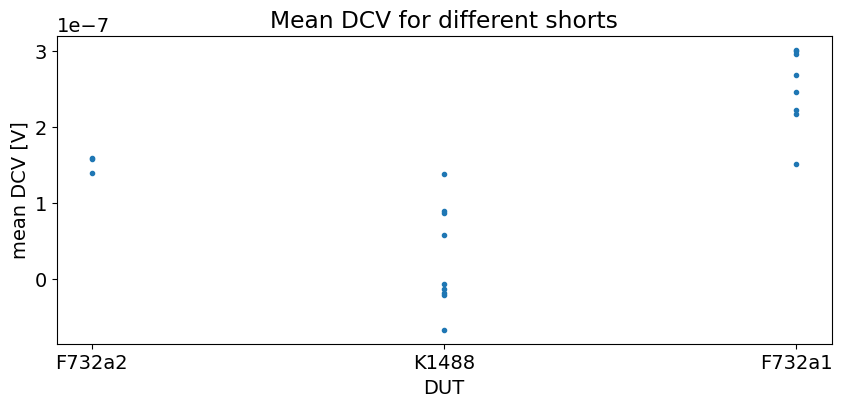

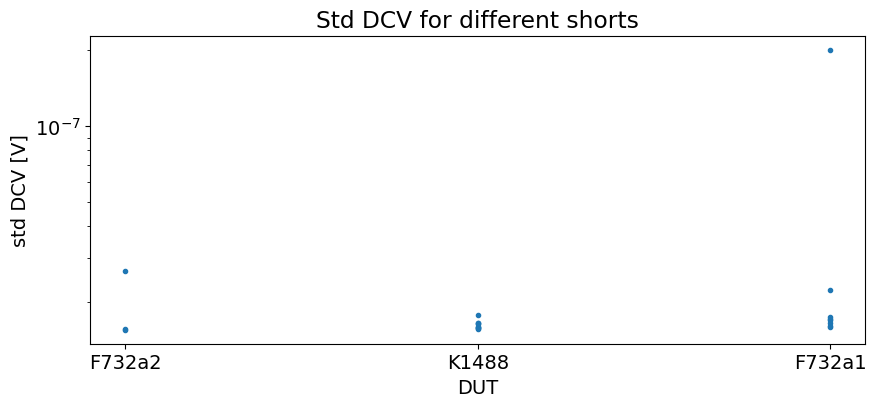

In [4]:
short_data_for_plot = short_data_grouped.reset_index()
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(short_data_for_plot[('dut_neg_lead', '')], short_data_for_plot[('k182_dcv', 'mean')], '.')
ax1.set_xlabel('DUT')
ax1.set_ylabel('mean DCV [V]')
ax1.set_title('Mean DCV for different shorts')
fig.show()
fig = plt.figure()
ax2 = fig.add_subplot(111)
plt.semilogy(short_data_for_plot[('dut_neg_lead', '')], short_data_for_plot[('k182_dcv', 'std')], '.')
ax2.set_xlabel('DUT')
ax2.set_ylabel('std DCV [V]')
ax2.set_title('Std DCV for different shorts')
plt.show()
